# Kiva Crowdfunding Challenge: Data Science for good, Kaggle

#### Kiva.org is an online crowdfunding platform to extend financial services to poor and financially excluded people around the world. Kiva lenders have provided over 1 billion dollars in loans to over 2 million people. In order to set investment priorities, help inform lenders, and understand their target communities, knowing the level of poverty of each borrower is critical. However, this requires inference based on a limited set of information for each borrower.

#### Following is the problem statement of this problem
# Problem Statement

#### For the locations in which Kiva has active loans, your objective is to pair Kiva's data with additional data sources to estimate the welfare level of borrowers in specific regions, based on shared economic and demographic characteristics.

#### A good solution would connect the features of each loan or product to one of several poverty mapping datasets, which indicate the average level of welfare in a region on as granular a level as possible. Many datasets indicate the poverty rate in a given area, with varying levels of granularity. Kiva would like to be able to disaggregate these regional averages by gender, sector, or borrowing behavior in order to estimate a Kiva borrower’s level of welfare using all of the relevant information about them. Strong submissions will attempt to map vaguely described locations to more accurate geocodes.

## IN THIS NOTEBOOK
#### 1) We will look at the general characteristics of the borrowers with respect to Loan Amounts, Loan terms and continents.
#### 2) After the above step, we will try to dig deeper into each of the continents we feel are interesting
#### 3) The final step which may also be done in another notebook will be emphasized in advanced analytic techniques/number crunching to approach the problem numerically than visually.

## Importing data files

#### There are a total of four KIVA files and 1 general country to continent mapping file. Lets explore each of them below

In [1]:
setwd("C:/Kaggle/kiva/")

# Kiva files
kiva_loans <- read.csv("kiva_loans.csv", header=T)
kiva_regions <- read.csv("kiva_mpi_region_locations.csv", header=T)
loan_theme_ids <- read.csv("loan_theme_ids.csv", header=T)
loan_theme_regions <- read.csv("loan_themes_by_region.csv", header=T)

# File containing country-continent mappings
continent <- read.csv("countryContinent.csv", header=T)

In [5]:
# Exploring data. File 1 KIVA_LOANS

# Contains the details about individual loans
# Things like ID, funded_amount in $, loan_amount in $, activity, use, term in months, date & time etc..

head(kiva_loans)[1:2,]

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
1,653051,300,300,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12,12,,female,irregular,2014-01-01
2,653053,575,575,Rickshaw,Transportation,to repair and maintain the auto rickshaw used in their business.,PK,Pakistan,Lahore,PKR,247,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11,14,,"female, female",irregular,2014-01-01


In [6]:
# KIVA_REGIONS
# Contains the details of individual locations like lat, long, region, country, world_region etc..

head(kiva_regions)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
1,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.7347725,70.8119953
2,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.1671339,63.7695384
3,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.3,"(35.8042947, 69.2877535)",35.8042947,69.2877535
4,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.7550603,66.8975372
5,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.8100067,67.8212104
6,"Daykundi, Afghanistan",AFG,Afghanistan,Daykundi,South Asia,0.313,"(33.669495, 66.0463534)",33.669495,66.0463534


In [7]:
# LOAN_THEME_IDS
# Details about why the loan was taken?

head(loan_theme_ids)

,id,Loan.Theme.ID,Loan.Theme.Type,Partner.ID
1,638631,a1050000000skGl,General,151
2,640322,a1050000000skGl,General,151
3,641006,a1050000002X1ij,Higher Education,160
4,641019,a1050000002X1ij,Higher Education,160
5,641594,a1050000002VbsW,Subsistence Agriculture,336
6,642256,a1050000000T3oX,Extreme Poverty,217


In [9]:
# LOAN_THEME_REGIONS
# Loan theme and regions joined

head(loan_theme_regions)[1:2,]

,Partner.ID,Field.Partner.Name,sector,Loan.Theme.ID,Loan.Theme.Type,country,forkiva,region,geocode_old,ISO,number,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo
1,171,Bai Tushum Bank,General Financial Inclusion,a1050000002YqaF,Green,Kyrgyzstan,No,"""The first May"" village",,KGZ,2,1700,"""The first May"" village, Kyrgyzstan","[(42.7338599, 78.3689411)]",1 May; Tyup; Tyup; Issyk-Kul Region; Kyrgyzstan,"(42.7338599, 78.3689411)",42.7338599,78.3689411,KGZ,
2,171,Bai Tushum Bank,General Financial Inclusion,a1050000007QIg8,Agriculture,Kyrgyzstan,No,"""The first May"" village",,KGZ,1,300,"""The first May"" village, Kyrgyzstan","[(42.7338599, 78.3689411)]",1 May; Tyup; Tyup; Issyk-Kul Region; Kyrgyzstan,"(42.7338599, 78.3689411)",42.7338599,78.3689411,KGZ,


In [10]:
# Continent to country mapping
head(continent)

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
1,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142,34
2,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150,154
3,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150,39
4,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2,15
5,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9,61
6,Andorra,AD,AND,20,ISO 3166-2:AD,Europe,Southern Europe,150,39


### So now we will start off with KIVA_LOANS and CONTINENT files to see the general patterns w.r.t Loan amounts and Loan terms

### Later we will drill down into the loan themes as well as specific regions

##### Importing a few packages as well as joining the continent data with the KIVA_LOANS data on Country
##### Since the continent column has North America coded as "NA", R is considering it to be a missing value. We will correct that error

In [20]:
# Import essentials
library(dplyr)
library(ggplot2)
#install.packages("moments")
library(moments)
#install.packages("gridExtra")
library(gridExtra)
library(repr)



# dplyr left join needs the keys in both data frames to be of the same name ("country" in our case)
kiva_loans$country <- as.character(kiva_loans$country)
continent$country <- as.character(continent$country)

# Joining the data and converting missing factor levels to "North America"
kiva_loans_new <- left_join(kiva_loans, continent, by = "country")
kiva_loans_new$continent <- addNA(kiva_loans_new$continent)
levels(kiva_loans_new$continent)[7] <- "North America"

Warning message:
: package 'moments' was built under R version 3.3.2Warning message:
: package 'gridExtra' was built under R version 3.3.3
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



### Distribution of Loan amounts split accross continents

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
: Removed 33459 rows containing non-finite values (stat_bin).

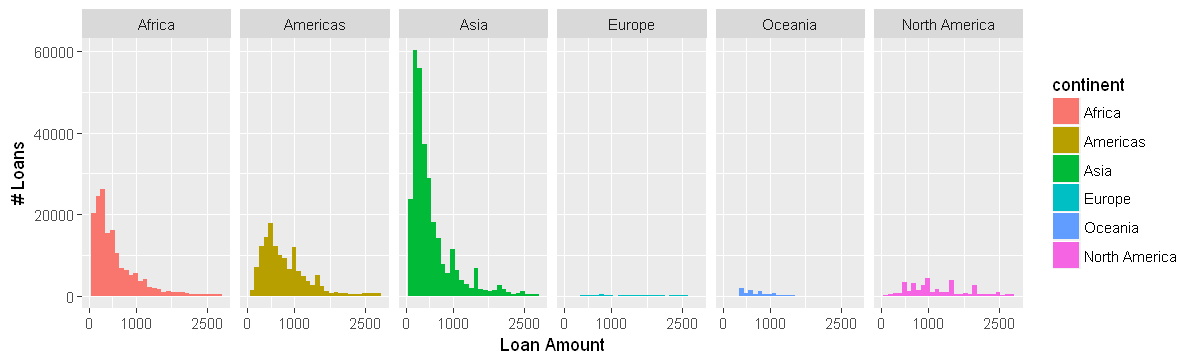

In [33]:
Loans_by_continent <- ggplot(data = kiva_loans_new, aes(x = loan_amount, fill = continent)) + 
                  geom_histogram() + facet_grid(.~continent) +
              scale_x_continuous("Loan Amount", limits = c(0,quantile(kiva_loans_new$loan_amount, .95)),
                                        breaks = c(0,1000, 2500)) +
                                    scale_y_continuous("# Loans")


# Change plot size to 4 x 3
options(repr.plot.width=10, repr.plot.height=3)
plot(Loans_by_continent)

##### The plot above shows the histograms of top 95% (in an effort to exclude outliers) sorted values of Loan Amount split by Continents.
##### We can see that the distribution in AMERICAS, AFRICA and ASIA is +vely skwewed, hence people in these regions comprise mostly of Small Borrowers (< 1000 USD)

##### Lets quickly check the skewness of these populations. Note that for skewness I have just put in the whole population so these include outliers as well.

In [25]:
# Skewness of the above populations

skewness_check <- data.frame(
          North_America = skewness(kiva_loans_new %>%
                         filter(continent == "North America") %>%
                         select(loan_amount)),
          Asia = skewness(kiva_loans_new %>%
                          filter(continent == "Asia") %>%
                          select(loan_amount)),
          Americas = skewness(kiva_loans_new %>%
                            filter(continent == "Americas") %>%
                            select(loan_amount)),
          Africa = skewness(kiva_loans_new %>%
                              filter(continent == "Africa") %>%
                              select(loan_amount)),
          Europe = skewness(kiva_loans_new %>%
                              filter(continent == "Europe") %>%
                              select(loan_amount)),
          Oceania = skewness(kiva_loans_new %>%
                              filter(continent == "Oceania") %>%
                              select(loan_amount))
)

skewness_check

,North_America,Asia,Americas,Africa,Europe,Oceania
loan_amount,2.648473,9.259486,11.288434,15.588050,22.783737,4.233068


##### We can see that North America and Oceania are the least skewed. So the people here take higher as well as lower loans
##### Asia, Americas and Africa as indicated by the plots are heavily skewed
##### The skewness of Europe seems to be affect by a few outliers as the plot indicated that it was NOT heavily skewed. We will explore this in detail further when we drill down into sub-regions of continents

### Now lets come to another variable which tells us the term of a loan in months.
##### Boxplot of this variable split by continents (OUTLIERS EXCLUDED)

Warning message:
: Removed 27386 rows containing non-finite values (stat_boxplot).

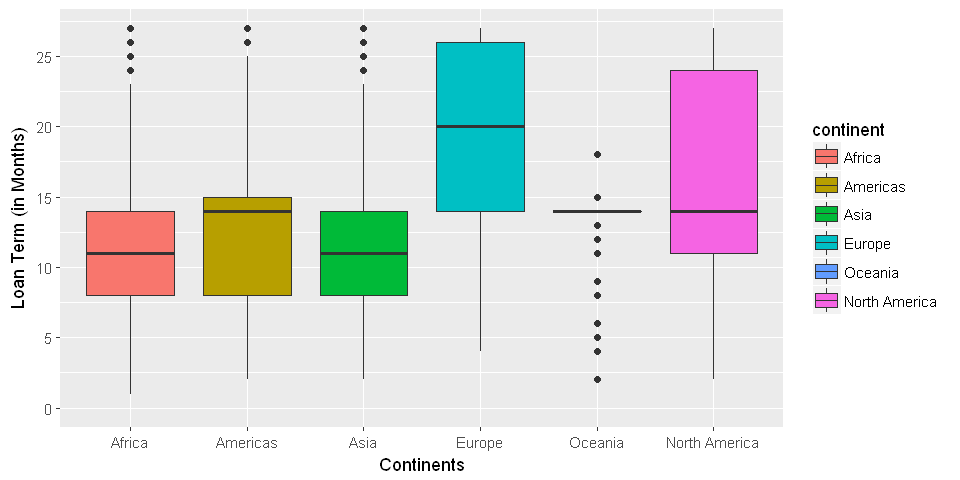

In [35]:
term_boxplots_continent <- ggplot(data = kiva_loans_new, 
                                  aes(x = continent, y = term_in_months, fill = continent)) +
  geom_boxplot() +
  scale_y_continuous("Loan Term (in Months)", limits = c(0,quantile(kiva_loans_new$term_in_months, .95)),
                     breaks = c(0,5,10,15,20,25))+
  scale_x_discrete("Continents")



# Change plot size
options(repr.plot.width=8, repr.plot.height=4)
plot(term_boxplots_continent)

##### We can see that Europe and NA has higher loan terms maybe indicating that the loan amount averages are higher in those continents. This is fairly obvious because Europe and NA are economically forward than other continents.

##### Africa Americas and Asia have lower loan terms

## Now let us compare these two variables i.e. Loan Amount and Loan term

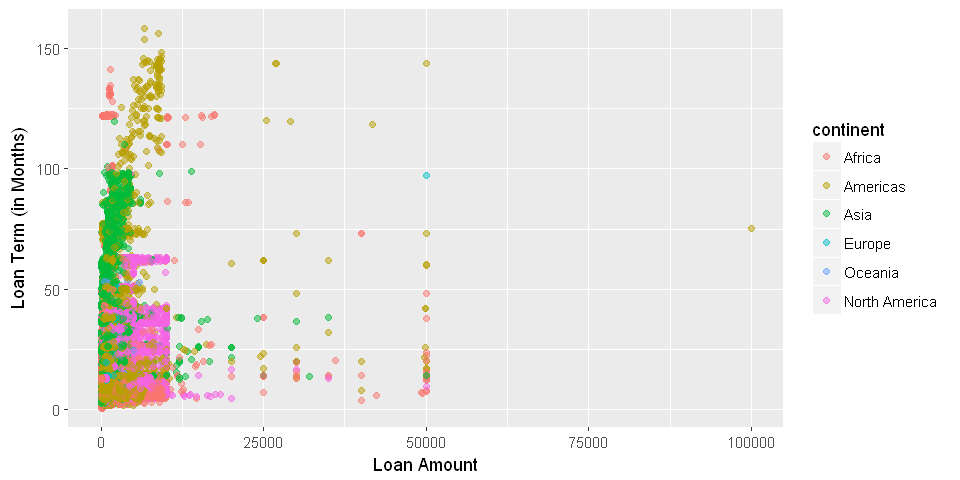

In [37]:
LoanAmt_term_continent <- ggplot(data = kiva_loans_new, aes(x = loan_amount, y = term_in_months, col = continent)) + 
          geom_jitter(alpha = 0.5) +
          scale_x_continuous("Loan Amount") +
          scale_y_continuous("Loan Term (in Months)")

plot(LoanAmt_term_continent)

#### The data consists of 500k+ points hence we have a problem of overfitting.
#### Lets look at only the continents which are taking the maximum number of loans.
#### We find this out using the following.

In [38]:
# % loans per continent among the total loans
prop.table(table(kiva_loans_new$continent))*100


                     Africa      Americas          Asia        Europe 
    0.0000000    24.5446622    21.9768923    45.0319947     0.4316118 
      Oceania North America 
    1.1851819     6.8296571 

Warning message:
: Removed 1 rows containing missing values (geom_point).

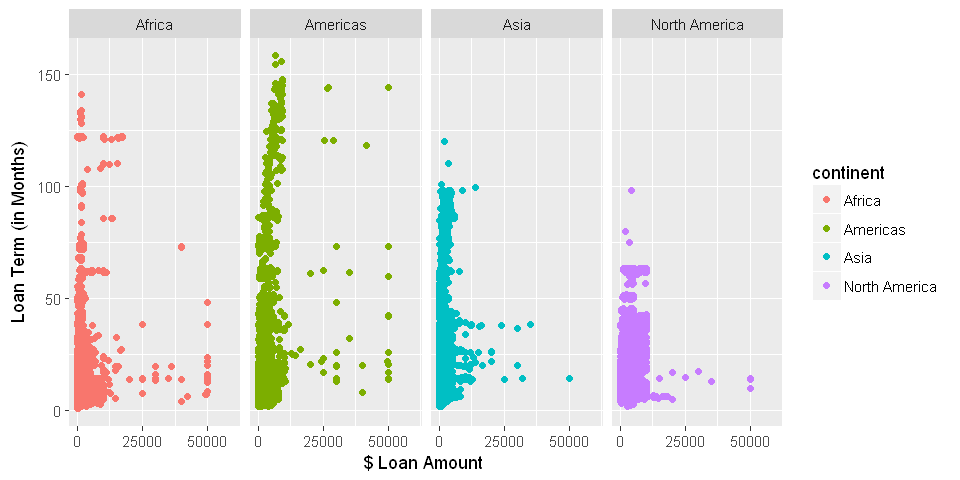

In [39]:
# Looking at AFRICA, ASIA and AMERICAS as well as NA. Europe and Oceania may be excluded atleast at this point

LoanAmt_term_top3 <- ggplot(
            data = kiva_loans_new %>% filter(continent %in% c("Americas", "Africa", "Asia", "North America")),
            aes(x = loan_amount, y = term_in_months, col = continent)) +
            geom_jitter() +
            facet_grid(.~continent)+
            scale_x_continuous(name = "$ Loan Amount ", limits = c(0, 60000),breaks = c(0,25000,50000)) +
            scale_y_continuous(name = "Loan Term (in Months)")


plot(LoanAmt_term_top3)

##### There is a very small cluster for Americas and Africa of High borrowers and fast payers. This cluster is almost absent for Asia and NA.
##### The LOAN AMOUNT range (thickness) of the vertical blue line cluster for Asia is slightly thinner than that of Africa and Americas i.e. the people might be borrowing lesser amounts if compares on a bigger picture than those in Americas, Africa and NA.
##### Americas interestingly has a cluster (see top left of the plot) consisting of small borrowers and slow payers which is absent in Asia, Africa and North America.

# NEXT STEPS
## 1) Include the loan themes and see how which loans indicate poverty and which ones don't
## 2) Look for external data sets which map the regions with poverty.
## 3) Get some interesting plots at a more granular level w.r.t region the next time. Can also do some plots using the lat, long.
## 4) Come up with a metric which indicates poverty using the data we have and plot it on lat-long.